
Trying to plot [these things](https://www.reddit.com/r/math/comments/4i1v1u/math_art_for_each_graph_the_vertices_are_exactly/). Not quite getting it. The criterion for determining the edges is not clear to me. And probably the _k_ for the _k_-NN algorithm applied changes from plot to plot. Anycase the code serves as an example of how to plot these types of things using `matplotlib`. 

In [42]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [60]:
def soft_fracture(n, a, k, figsize=(8, 8)): 
    axis = np.arange(1, n)
    grid = np.transpose([np.tile(axis, len(axis)), np.repeat(axis, len(axis))])
    points = np.array([[x, y] for x, y in grid if ((x*y - a) % n == 0 or (x*y + a) % n == 0)])
    neighbors = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(points)
    distances, neighborhoods = neighbors.kneighbors(points)
    plt.figure(figsize=figsize, facecolor='black')
    plt.axis('off')
    for neighborhood in neighborhoods:
        base_point = points[neighborhood[0]]
        extra_points = [points[i] for i in neighborhood[1:]]
        for extra_point in extra_points:
            pair = np.array([base_point, extra_point])
            difference = np.diff(pair, axis=0).reshape([2,])
            if not (any(difference == 0) or np.abs(difference[1]/difference[0]) == 1):
                x_points, y_points = pair.T
                plt.plot(x_points, y_points, color='white', linewidth=0.3)
    return points, neighborhoods

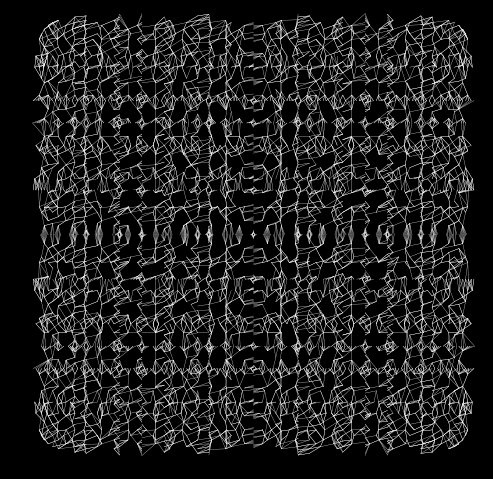

In [53]:
_ = soft_fracture(800, 0, 10)

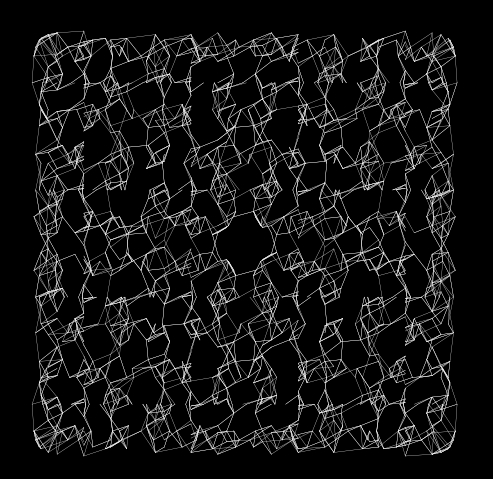

In [54]:
_ = soft_fracture(240, 30, 10)

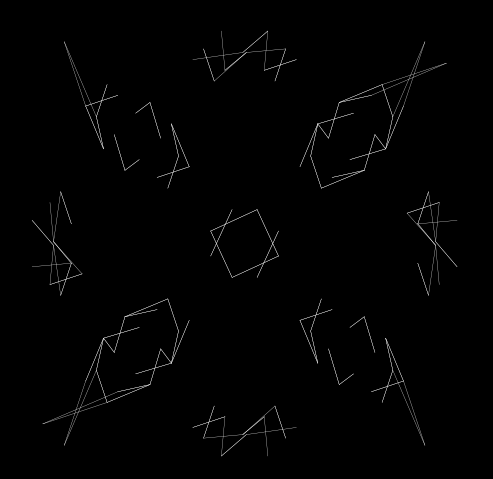

In [55]:
_ = soft_fracture(240, 107, 6)

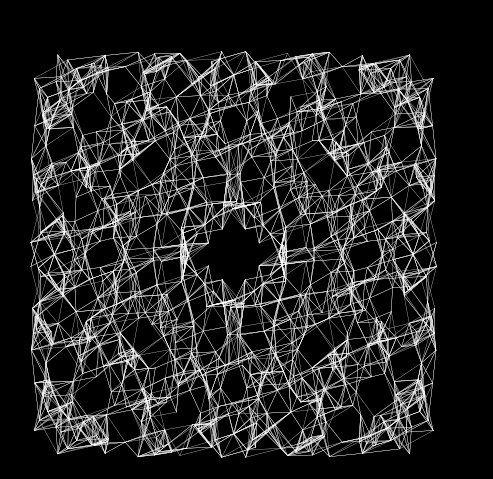

In [56]:
_ = soft_fracture(729, 343, 15)

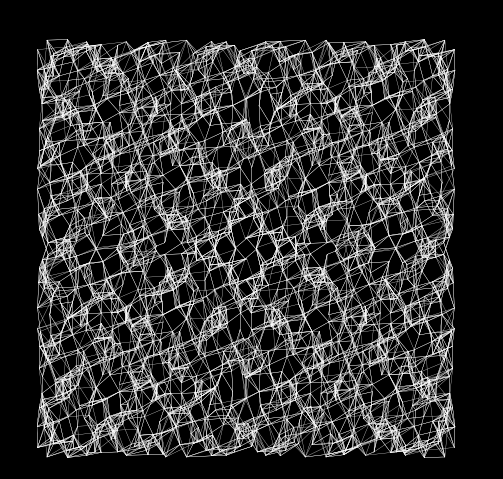

In [57]:
_ = soft_fracture(1500, 111, 15)

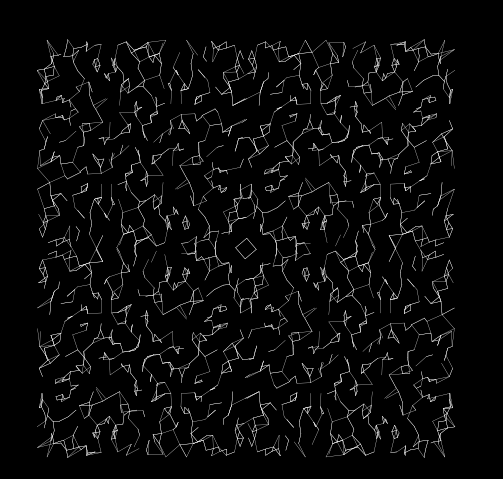

In [58]:
_ = soft_fracture(1500, 111, 5)

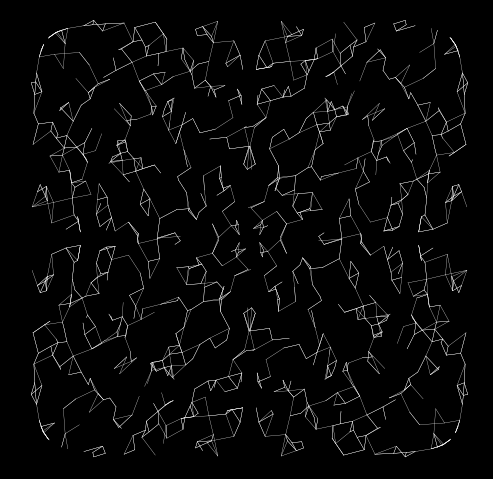

In [59]:
_ = soft_fracture(491, 71, 5)